# CS237 - Fall 2025 - Programming Assignment 02
## Due Wednesday, September 17th at 09:00 p.m. in Gradescope

Submit your programming assignment by filling in this notebook with your solutions. Write all your code in this file, **be sure to click on Runtime-> Run all and verify that everything works as you intended**, and then upload the `ipynb` file to Gradescope.

### Notes:
* You can reuse the code provided in this and previous homework descriptions.
* You are obliged to go to "Runtime->Run All" and execute all cells before downloading the .ipynb file.
* Do your best to follow these principles:
 * **Correctness**: your code should be free of error. Debug it as many times as possible.
 * **Clarity**: write high-quality comments, functions, and variable naming
 * **Simplicity**: write your solution in the assigned cells, don't create new cells or reorder them.
 * **Completeness**: the solution to all problems must be included in one Python notebook, and no function should be blank.
 * **Authenticity**, since we assume that you posted your code written by you.

# Programming goals

* Recalling the basic elements of Python programming and generating random numbers.

* Get acquainted with the classical probability field, the relative frequency and the relation of it to the probability.




# Warm-up
1. Go to https://docs.python.org/2/library/random.html and read about the random library. We will use the following two functions, which you should understand well before proceeding:

In [2]:
# Run this cell by clicking on the play button on the left to load the random library
import random

2. In the next cell we will use the function randint to generate integers between 1 and 59. To run the code, move the mouse cursor on the top of the cell and click on the play button on the left.

In [3]:
# random.randint(a, b): returns a random integer N such that a <= N <= b.
random.randint(1,59)

38

# [Risk - https://en.wikipedia.org/wiki/Risk_(game)](https://en.wikipedia.org/wiki/Risk_(game))

In the strategic board game called [Risk](https://en.wikipedia.org/wiki/Risk_(game)), one player can attack up to three soldiers simultaneously, while the defending player can defend up to two. In the case of exactly three attackers and two defenders, the collision is as follows. An attacking player rolls three red dice while the defending player rolls two blue dice. Then they compare the bigest throws of the attacker and the defender. The lesser value loses a soldier, in the case of equal values the attacker loses one soldier. Then the second largest numbers are also compared in the same way. Thus, the battle has three outcomes: the attacker loses two soldiers, each side loses 1-1 soldiers, the defender loses two soldiers.

1. Fix the code cells below to simulate a experiment 1000000 times to determine the frequency of the three outcomes: the attacker loses two soldiers, each side loses 1-1 soldiers, the defender loses two soldiers.
    
2. Run the next cells to calculate the exact probability of the three outcomes by examining all possible cases. The probability is the ratio of the favorable cases and the total number of cases. The output of the program should look like this (of course with other numbers)

```
                     Attacker  Draw      Defender
Simulation           0.33988   0.73011   0.23001
Probability          0.94000   0.43000   0.23000
```
3. Run all cells and submit your code to Gradescope. After submiting it to Gradescope, make sure you can see the plotted histogram at the botom of this Python Notebook on the Gradescope webpage.

# Implementation


In [4]:
# Don't change this cell
import random
def die():
  # Used this function to generate values from a 6-sided fair die
  return random.randint(1,6)

In [2]:
# Fix this code to simulate one attack.
import random
def simulate_one_attack():
  # YOU MUST USE die()
  # return the string 'attacker' if the attacker wins and the defender loses
  # return the string 'draw' in case of a draw
  # return the string 'defender' if the the defender wins and the attacker loses
  attacker_die = [die() for i in range(3)]
  attacker_die.sort(reverse=True)
  defender_die = [die() for i in range(2)]
  defender_die.sort(reverse=True)
  if attacker_die[0] <= defender_die[0] and attacker_die[1] <= defender_die[1]:
    return 'attacker'
  elif attacker_die[0] > defender_die[0] and attacker_die[1] > defender_die[1]:
    return 'defender'
  else:
    return 'draw'

In [5]:
# Don't change this cell
from collections import Counter
from itertools import product

num_trials = 1000000
# Outcome labels
sim_results = {
    'attacker': 0,  # Attacker loses 2 soldiers
    'draw': 1,      # Each loses 1 soldier
    'defender': 2   # Defender loses 2 soldiers
}
for i in range(num_trials):
  outcome = simulate_one_attack()
  sim_results[outcome]+=1

# empirical probabilities
for frequency in sim_results:
  sim_results[frequency]= sim_results[frequency]/num_trials

all_rolls = list(product(range(1, 7), repeat=5))
exact_counter = Counter()

for rolls in all_rolls:
    attacker_dice = sorted(rolls[:3], reverse=True)
    defender_dice = sorted(rolls[3:], reverse=True)

    losses = [0, 0]  # [attacker losses, defender losses]

    for a_die, d_die in zip(attacker_dice[:2], defender_dice):
        if a_die > d_die:
            losses[1] += 1
        else:
            losses[0] += 1

    if losses == [2, 0]:
        exact_counter['attacker'] += 1
    elif losses == [1, 1]:
        exact_counter['draw'] += 1
    elif losses == [0, 2]:
        exact_counter['defender'] += 1

total_cases = len(all_rolls)
exact_results = {
    outcome: round(exact_counter[outcome] / total_cases, 5)
    for outcome in ['attacker', 'draw', 'defender']
}

# Print results
print(f"{'':25s}Attacker   Draw      Defender")
print(f"{'Experiment':25s}{sim_results['attacker']:<10.5f}   {sim_results['draw']:<10.5f}   {sim_results['defender']:<10.5f}")
print(f"{'Probability':25s}{exact_results['attacker']:<10.5f}   {exact_results['draw']:<10.5f}   {exact_results['defender']:<10.5f}")

                         Attacker   Draw      Defender
Experiment               0.29217      0.33604      0.37180   
Probability              0.29257      0.33578      0.37166   


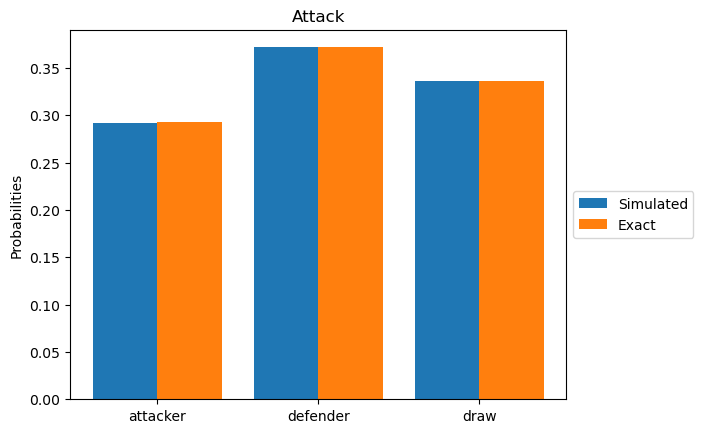

In [6]:
import numpy as np
import matplotlib.pyplot as plt

outcomes = ['attacker',  'defender', 'draw']
vals1, vals2 = [sim_results['attacker'], sim_results['defender'], sim_results['draw']], [exact_results['attacker'], exact_results['defender'], exact_results['draw']]

# Bar width and x locations
w, x = 0.4, np.arange(len(outcomes))

fig, ax = plt.subplots()
ax.bar(x - w/2, vals1, width=w, label='Simulated')
ax.bar(x + w/2, vals2, width=w, label='Exact')

ax.set_xticks(x)
ax.set_xticklabels(outcomes)
ax.set_ylabel('Probabilities')
ax.set_title('Attack')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

